In [1]:
import warnings
warnings.filterwarnings('ignore')
#import the libraries
import itertools
import pandas as pd 
import numpy as np
import statsmodels.api as sm
# Matplotlib for plotting
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline
from matplotlib.pylab import rcParams
plt.style.use('fivethirtyeight')

from fbprophet import Prophet as proph

In [2]:
# import, set column to zero to get rid of old index
#made this dataset stationary with other notebook
ts=pd.read_csv('/Users/denisdunn/Downloads/dataset_stationary.csv', index_col=0)

In [3]:
#older data sets
#ts = pd.read_csv('/Users/denisdunn/Downloads/FARM.csv')
#ts = ts.drop(ts[['Open','High','Low','Adj Close','Volume']], axis=1) 
#ts['Date'] = pd.to_datetime(ts['Date'],unit='s')


In [4]:
#changed names for the prophet model
ts = ts.rename(columns={'Date':'ds',
                        'Target': 'y'})

ts.head(5)

,ds,y,ICO_stationary,rain_stationary,Bond_stationary,Tea_stationary,Starbucks_stationary
13,1993-07-01,14.996429,4.6075,79.831,-0.157489,0.071692,-0.012102
14,1993-08-01,14.738636,3.0025,-63.125,-0.127511,-0.051624,-0.094235
15,1993-09-01,14.742857,-0.4150,43.729,-0.317727,-0.040546,0.095550
16,1993-10-01,15.040476,-7.1700,36.243,-0.031524,0.060219,0.021023
17,1993-11-01,14.102381,-0.1050,7.814,0.368762,-0.053346,-0.150451


In [5]:
ts.head()

,ds,y,ICO_stationary,rain_stationary,Bond_stationary,Tea_stationary,Starbucks_stationary
13,1993-07-01,14.996429,4.6075,79.831,-0.157489,0.071692,-0.012102
14,1993-08-01,14.738636,3.0025,-63.125,-0.127511,-0.051624,-0.094235
15,1993-09-01,14.742857,-0.4150,43.729,-0.317727,-0.040546,0.095550
16,1993-10-01,15.040476,-7.1700,36.243,-0.031524,0.060219,0.021023
17,1993-11-01,14.102381,-0.1050,7.814,0.368762,-0.053346,-0.150451


In [8]:
# set column to datetime, and set it as the index
ts['ds'] = pd.to_datetime(ts['ds'] )
ts = ts.set_index('ds')
ts.head()

,y,ICO_stationary,rain_stationary,Bond_stationary,Tea_stationary,Starbucks_stationary
ds,,,,,,
1993-07-01,14.996429,4.6075,79.831,-0.157489,0.071692,-0.012102
1993-08-01,14.738636,3.0025,-63.125,-0.127511,-0.051624,-0.094235
1993-09-01,14.742857,-0.4150,43.729,-0.317727,-0.040546,0.095550
1993-10-01,15.040476,-7.1700,36.243,-0.031524,0.060219,0.021023
1993-11-01,14.102381,-0.1050,7.814,0.368762,-0.053346,-0.150451


In [ ]:
# set training and test sets for later
ts_training = ts.loc[ts['ds'] <= '2017-12-31']
ts_test = ts.loc[ts['ds'] >= '2016-06-01']

In [ ]:
#plotting the dataframe
ax = ts
ax.plot(figsize=(15, 8),subplots=False)
#ax.set_ylabel('No. of Airline Passengers/Month')
#ax.set_xlabel('Date')

plt.show()

In [ ]:
# checking the distribution
ts.hist()

In [ ]:
# showing different way to plot
ts.plot(figsize = (22,8), style = 'b.')
plt.show()

In [ ]:
# Plot a density plot for coffee dataset
ts.plot(kind='kde', figsize = (12,6))
plt.show()

In [ ]:
# test the correaltion
ts.corr()

In [ ]:
#testing the rolling mean and standard deviation
rolmean = ts['y'].rolling(window = 12, center = False).mean()
rolstd = ts['y'].rolling(window = 12, center = False).std()

In [ ]:
# plot the rolling mean and standard deviation and the target
fig = plt.figure(figsize=(12,7))
orig = plt.plot(ts['y'], color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [ ]:

# Log transform timeseries and compare with original to check the effect
ts_log = np.log(ts['y'])
ts_sqrt= np.sqrt(ts['y'])
fig = plt.figure(figsize=(12,6))
plt.plot(ts['y'],  color='blue');
plt.show()
fig = plt.figure(figsize=(12,6))
plt.plot(ts_log, color='blue');
plt.show()
fig = plt.figure(figsize=(12,6))
plt.plot(ts_sqrt, color='blue');

In [ ]:
# function for a stationary test
#Dickey-Fuller Test 
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = timeseries.rolling( window=12).mean()
    rolstd = timeseries.rolling( window=12).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput )

In [ ]:
# testing the dicky-fuller for stationarity
test_stationarity(ts['y'])

In [ ]:
# taking a difference 
ts['y'].diff(periods=1).iloc[1:]

In [ ]:
# checking the stationarity of difference of one
test_stationarity(ts['y'].diff(periods=1).iloc[1:])

In [ ]:
# playing around and seeing how the log transforms the numbers
rolmean = np.log(ts['y']).rolling(window = 7).mean()
fig = plt.figure(figsize=(11,7))
orig = plt.plot(np.log(ts['y']), color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [ ]:
# Subtract the moving average from the original data and check
data_minus_rolmean = np.log(ts['y']) - rolmean
data_minus_rolmean.head(10)


In [ ]:
# Drop the NaN values from timeseries calculated above
data_minus_rolmean.dropna(inplace=True)

In [ ]:
# Plot the result
fig = plt.figure(figsize=(11,7))
plt.plot(data_minus_rolmean, color='blue',label='FARM price- rolling mean')
plt.legend(loc='best')
plt.title('FARM price while the rolling mean is subtracted')
plt.show(block=False)

In [ ]:
# Use Pandas ewma() to calculate Weighted Moving Average of ts_log

# Plot the original data with exp weighted average
# Use Pandas ewma() to calculate Weighted Moving Average of ts_log
exp_rolmean = np.log(ts['y']).ewm(halflife = 4).mean()

# Plot the original data with exp weighted average
fig = plt.figure(figsize=(12,7))
orig = plt.plot(np.log(ts['y']), color='blue',label='Original')
mean = plt.plot(exp_rolmean, color='red', label='Exponentially Weighted Rolling Mean')
plt.legend(loc='best')
plt.title('Exponentially Weighted Rolling Mean & Standard Deviation')
plt.show(block=False)

In [ ]:
# Subtract the moving average from the original data and plot
# Subtract the moving average from the original data and check head for Nans
data_minus_exp_rolmean = np.log(ts['y']) - exp_rolmean
data_minus_exp_rolmean.head(15)

fig = plt.figure(figsize=(11,7))
plt.plot(data_minus_exp_rolmean, color='blue',label='FARM Price - weighted rolling mean')
plt.legend(loc='best')
plt.title('FARM Price while the weighted rolling mean is subtracted')
plt.show(block=False)

In [ ]:
# difference your data and look at the head
data_diff = data_minus_exp_rolmean.diff(periods=12)
data_diff.head(15)

In [ ]:
# plot your differenced time series
fig = plt.figure(figsize=(11,7))
plt.plot(data_diff, color='blue',label='FARM Price - rolling mean')
plt.legend(loc='best')
plt.title('Differenced FARM Price series')
plt.show(block=False)

In [ ]:
# import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(np.log(ts['y']))

# Gather the trend, seasonality and noise of decomposed object
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(np.log(ts['y']), label='Original', color="blue")
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color="blue")
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color="blue")
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color="blue")
plt.legend(loc='best')
plt.tight_layout()

In [ ]:
# drop nas
data_diff.dropna(inplace=True)

In [ ]:
#plotting the auto correlation and the partial correalation
# not much correaling from one step away
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 14, 5

plot_acf(ts_test['y'].diff(periods=1).iloc[1:],lags=20)

plot_pacf(ts_test['y'].diff(periods=1).iloc[1:], lags = 20);

In [ ]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 3)
#s=list(range(0,15))
# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
pdqs = [(x[0], x[1], x[2],0) for x in list(itertools.product(p, d, q,))]

In [ ]:
ts.columns

In [ ]:
# exogenous variables to try
ex=ts[['ICO_stationary','rain_stationary','Bond_stationary','Tea_stationary','Starbucks_stationary']]

In [11]:
# different combo of exogenous variables
ex=ts[['Bond_stationary','Tea_stationary', 'Starbucks_stationary']]

In [ ]:
# Run a grid with pdq and seasonal pdq parameters calculated above and get the best AIC value
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(ts_test['y'],exog=ex,
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=True,
                                            enforce_invertibility=False)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
            print('ARIMA {} x {} : AIC Calculated ={}'.format(comb, combs, output.aic))
        except:
            continue

In [ ]:
# Find the parameters with minimal AIC value.

ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
ans_df.loc[ans_df['aic'].idxmin()]

In [ ]:
ts.columns

In [ ]:
ts.iloc[250:-16]

In [22]:
# sub project to see if we can predict direction from one month to the next
df=pd.read_csv('/Users/denisdunn/mod_4_test')

In [23]:
df=df[36:]

In [24]:
# created columns to check direction of real vs prediction
df["predict_col"]=df['pred'].diff(periods=-1)

In [25]:
#check direction of real vs predictions
df['real_vs_real']=df['y'].diff(periods=-1)

In [26]:
# data frame showing that the predictions can call 7 out of 11 directions by month
df[['Date','y','pred','real_vs_real','predict_col']]

,Date,y,pred,real_vs_real,predict_col
36,2018-04-01,29.026191,NaN,1.953463,NaN
37,2018-05-01,27.072727,28.769053,-3.309654,1.909348
38,2018-06-01,30.382381,26.859705,1.156191,-3.967194
39,2018-07-01,29.226190,30.826899,0.152277,1.646293
40,2018-08-01,29.073913,29.180606,1.571282,0.144505
41,2018-09-01,27.502632,29.036101,2.841762,1.844028
42,2018-10-01,24.660869,27.192073,0.422298,2.619698
43,2018-11-01,24.238571,24.572375,0.674887,0.728157
44,2018-12-01,23.563684,23.844218,-0.857268,0.078696
45,2019-01-01,24.420952,23.765522,0.184636,-0.657174


In [37]:
# testing different shapes for sarimax
ts_test = ts.iloc[154:-1]
print(ts_test.shape)
ex=ts_test[['Tea_stationary',]]

(156, 7)


In [38]:
ts_test.head()

,y,ICO_stationary,rain_stationary,Bond_stationary,Tea_stationary,Starbucks_stationary,pred
ds,,,,,,,
2006-05-01,20.641364,-1.4000,-38.946,0.121541,0.054604,-0.080895,NaN
2006-06-01,20.885000,-1.1225,21.829,-0.003636,0.028573,0.014702,NaN
2006-07-01,21.141500,3.5775,52.575,-0.020823,0.009346,-0.016975,NaN
2006-08-01,20.896087,6.8150,-183.936,-0.208798,-0.028304,-0.096049,NaN
2006-09-01,20.723500,-1.2950,33.324,-0.157852,-0.111226,0.210753,NaN


In [42]:
# running a Sarimax model with best parameters we found earlier
# using exogenous variables and found that Tea is the only variable that helps
model = sm.tsa.statespace.SARIMAX(ts_test['y'],exog=ex,
                                order=(1, 0, 0),
                                #seasonal_order=(0, 0, 1, 0),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

output = model.fit()

print(output.summary().tables[1])

                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Tea_stationary     2.9211      1.545      1.890      0.059      -0.107       5.950
ar.L1              0.9976      0.005    193.861      0.000       0.987       1.008
sigma2             2.4731      0.292      8.456      0.000       1.900       3.046


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



In [13]:
#print out the prediction
ts['pred'] = output.predict(start=-12,dynamic=False)

In [ ]:
ts.tail(50)

In [ ]:
# saved prediction to compute the side project of direction per month
trader.to_csv('mod_4_test')

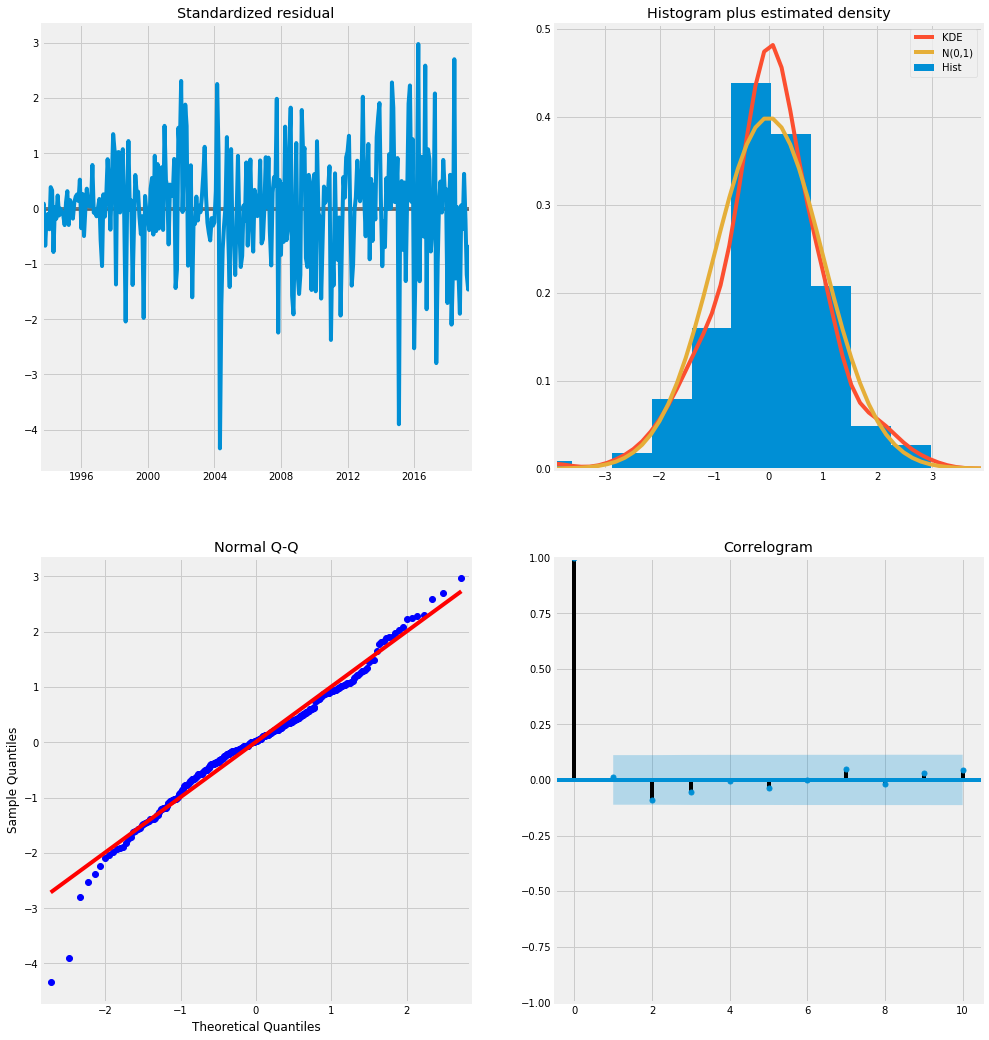

In [14]:
# Use plot_diagnostics with results calculated above.
output.plot_diagnostics(figsize=(15, 18))
plt.show()

In [ ]:
trader

In [ ]:

output.head()

In [ ]:
ts_test.head()

In [ ]:
# pred_zz = output.get_prediction( start=300,end=450, dynamic=False)
ts['pred'] = output.predict(start=300,end=305, dynamic=False)

# pred_conf = pred_zz.conf_int()

In [ ]:
# pred_conf

TypeError: float() argument must be a string or a number, not 'Period'

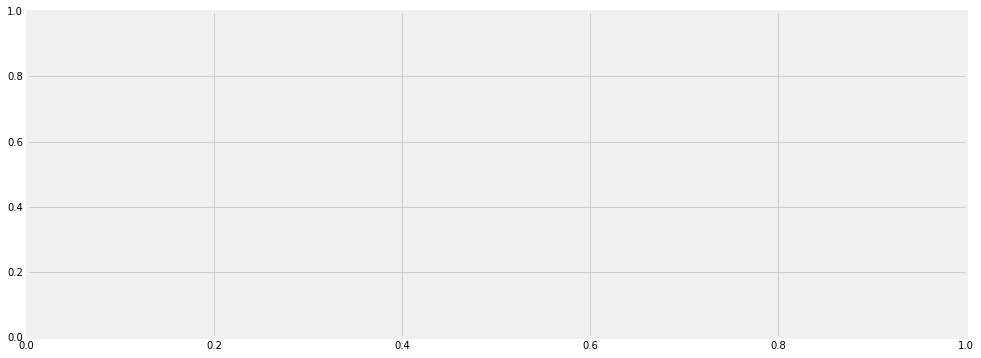

In [19]:
# Plot real vs predicted values along with confidence interval

rcParams['figure.figsize'] = 15, 6

#Plot observed values
ax = ts['y'].plot(label='observed')

#Plot predicted values
ts['pred'].predict.plot(ax=ax, label='One-step ahead Forecast', alpha=.9)

#Plot the range for confidence intervals
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=.5)

#Set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('FARM Price')
plt.legend()

plt.show()

In [20]:
# Get the Real and predicted values
ts_forecasted = pred.predicted_mean
ts_truth = ts['y']

# Compute the mean square error
mse = ((ts_forecasted - ts_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

NameError: name 'pred' is not defined

In [ ]:
# using the facebook prophet model
Model = proph(interval_width=0.95)

In [ ]:
# fit the model
Model.fit(ts)

In [ ]:
#make a future dataframe monthy predictions
future_dates=Model.make_future_dataframe( periods=20,freq='M')

In [ ]:
# predict out
forecast = Model.predict(future_dates)
forecast.tail()

In [ ]:
# show our important variables
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

In [ ]:
# plot the model
Model.plot(forecast, uncertainty=True)
plt.show()

In [ ]:
# look at the components and trends
Model.plot_components(forecast)
plt.show()

In [ ]:
# messed around with differencing
difference=ts['y'].diff(periods=1)

In [ ]:
# messed around plotting
difference.plot()

In [ ]:
# playing around with shitting
shifted=ts.shift(periods=50)

In [ ]:
#playing arond with concating the two
lag_1=pd.concat([shifted,ts],axis=1)

In [ ]:
# plotting it
lag_1.plot(alpha=.8)

In [ ]:
# checking correaltion
lag_1.corr()

In [ ]:
# auto correlation
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(ts['y'].dropna());

In [ ]:
#import libraries for practice
from statsmodels.graphics.tsaplots import plot_acf

In [21]:
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm

# Fit an MA(1) model to the first simulated data
mod_arma = ARMA(data_diff, order=(1,0))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

# Print out the estimate for the constant and for theta
print(res_arma.params)

NameError: name 'data_diff' is not defined